In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import pylab             as pl
import numpy             as np
import matplotlib.pyplot as plt

from   astropy.table     import Table

In [3]:
sys.path.append(os.environ['HOME'])
sys.path.append(os.environ['HOME'] + '/DESI/')

In [4]:
os.environ['CODE_ROOT'] = os.environ['HOME'] + '/DESI/'

In [5]:
import pubplot

from   vmaxer      import vmaxer
from   smith_kcorr import test_plots, test_nonnative_plots
from   cosmo       import distmod, volcom
from   lumfn       import lumfn
from   schechter   import named_schechter
from   findfile    import findfile
from   poisson     import fillfactor_expectation

In [6]:
survey    = 'gama'
version   = 'GAMA4'
dryrun    = False

In [7]:
fpath     = findfile(ftype='ddp_n8', dryrun=dryrun, version=version, survey=survey)
gama_ddp  = Table.read(fpath)
gama_ddp

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX,DDP [3],DDPZLIMS [3],RAND_N8,FILLFACTOR,RANDSEP,RANDMATCH,BOUND_DIST,rFILLFACTOR,FILLFACTOR_VMAX,DDP1_N8,DDP2_N8,DDP3_N8,DDP1_DELTA8,DDP1_DELTA8_TIER
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,,,,,,,,,,,,,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64,int64,int64,float64,float64,float64,int64,float64,float64,float64,int64,int64,int64,float64,int64
55188,587722982814187660,180.82655947,-0.39458166,18.46422,0.25672,4,G12_Y1_ND8_031,6,21.206772,19.584589,18.446634,17.97138,17.72121,0.25672,917.8466870621888,39.81385072341665,G12,0,0,-730.2576298489741,-10.535561971539122,-5.029703976591031,730.3073889208534,5.443332547325564,-5.830073685156636,1.1379547,18.46422,0.7607404258942744,0,5,0.04887595303406436,0.4260902390533346,0.27640192701242194,0.749702483670456,0.6646541552560284,0.8,-0.24901842,-0.20537601,-21.377014187623324,-21.420656589318575,-21.626032603432,39.841234234620394,40.09025265042907,39.884876636315646,-0.01583765366376648,0.3047684424571552,0.20088722469843462,0.5699437321708185,-21.301499485309336,1.3357792,0.41656522368805204,0.0,-6.46422,0.015843664127987742,0.0,27306794.654809795,1 .. 0,1 .. 0,25296.0,1.0,0.6965319826189821,380950,29.981821901565855,1.0,0.7012996482542835,40,0,0,2.057072186862452,6
278732,587726031691317538,133.47427045,0.92585357,18.429876,0.10815,4,G09_Y1_DN2_161,6,20.990864,19.358027,18.368195,17.947943,17.637024,0.10815,351.7923973276524,37.731432247887966,G9,0,0,-218.39253472524186,230.3447880145794,5.1296610471387325,216.7865585300106,-231.8620055037295,4.892080964056602,0.9898319,18.429876,0.9688495770491049,0,6,-0.09239964592949461,-0.07141729854012292,0.13794395924939717,0.3208821741578874,0.8068937095299864,0.8,-0.1049055,-0.08652,-19.334594378614682,-19.352979878330487,-19.439499879622716,37.76447070612933,37.869376207137364,37.782856205845135,-0.09743395784760353,-0.08586773220326212,0.11929092051459758,0.17930755751040117,-19.31594133987988,1.3701229,0.18856443378994245,0.0,-6.4298763,0.006182943374310169,0.0,2948326.223824587,0 .. 0,1 .. 0,25588.0,1.0,0.7703974668072231,361829,11.018197372357909,1.0,0.6144594058418834,70,98,0,4.349876327009291,8
3609417,587729150913216637,134.52787406,-1.36362038,18.398266,0.18092,4,G09_Y4_207_244,6,20.461782,19.233057,18.310143,17.828026,17.603497,0.18092,617.793758703047,38.95421758251315,G9,0,0,-366.75557601074127,372.85017788630597,-12.449528045812439,364.13297095286447,-375.3984434846844,-12.848600223403427,0.9229145,18.398266,0.746638784233803,0,5,-0.026495373335477412,0.14978034743560237,0.20006894095644434,0.4681674865719224,0.6548159593894047,0.8,-0.1754924,-0.144736,-20.580528278955132,-20.611284677990586,-20.75602068484655,38.978794117578175,39.154286523469594,39.00955051661363,-0.05453841031099389,0.09301790128337362,0.16218646805120723,0.3581931909970369,-20.542645806049894,1.4017334,0.3152441029277089,0.0,-6.398266,0.010970171585470818,0.0,12682008.723311

In [8]:
fpath     = findfile(ftype='zmax', dryrun=dryrun, version=version, survey=survey)
gama_zmax = Table.read(fpath)
gama_zmax

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64
55188,587722982814187660,180.82655947,-0.39458166,18.46422,0.25672,4,G12_Y1_ND8_031,6,21.206772,19.584589,18.446634,17.97138,17.72121,0.25672,917.8466870621888,39.81385072341665,G12,0,0,-730.2576298489741,-10.535561971539122,-5.029703976591031,730.3073889208534,5.443332547325564,-5.830073685156636,1.1379547,18.46422,0.7607404258942744,0,5,0.04887595303406436,0.4260902390533346,0.27640192701242194,0.749702483670456,0.6646541552560284,0.8,-0.24901842,-0.20537601,-21.377014187623324,-21.420656589318575,-21.626032603432,39.841234234620394,40.09025265042907,39.884876636315646,-0.01583765366376648,0.3047684424571552,0.20088722469843462,0.5699437321708185,-21.301499485309336,1.3357792,0.41656522368805204,0.0,-6.46422,0.015843664127987742,0.0,27306794.654809795
278732,587726031691317538,133.47427045,0.92585357,18.429876,0.10815,4,G09_Y1_DN2_161,6,20.990864,19.358027,18.368195,17.947943,17.637024,0.10815,351.7923973276524,37.731432247887966,G9,0,0,-218.39253472524186,230.3447880145794,5.1296610471387325,216.7865585300106,-231.8620055037295,4.892080964056602,0.9898319,18.429876,0.9688495770491049,0,6,-0.09239964592949461,-0.07141729854012292,0.13794395924939717,0.3208821741578874,0.8068937095299864,0.8,-0.1049055,-0.08652,-19.334594378614682,-19.352979878330487,-19.439499879622716,37.76447070612933,37.869376207137364,37.782856205845135,-0.09743395784760353,-0.08586773220326212,0.11929092051459758,0.17930755751040117,-19.31594133987988,1.3701229,0.18856443378994245,0.0,-6.4298763,0.006182943374310169,0.0,2948326.223824587
3609417,587729150913216637,134.52787406,-1.36362038,18.398266,0.18092,4,G09_Y4_207_244,6,20.461782,19.233057,18.310143,17.828026,17.603497,0.18092,617.793758703047,38.95421758251315,G9,0,0,-366.75557601074127,372.85017788630597,-12.449528045812439,364.13297095286447,-375.3984434846844,-12.848600223403427,0.9229145,18.398266,0.746638784233803,0,5,-0.026495373335477412,0.14978034743560237,0.20006894095644434,0.4681674865719224,0.6548159593894047,0.8,-0.1754924,-0.144736,-20.580528278955132,-20.611284677990586,-20.75602068484655,38.978794117578175,39.154286523469594,39.00955051661363,-0.05453841031099389,0.09301790128337362,0.16218646805120723,0.3581931909970369,-20.542645806049894,1.4017334,0.3152441029277089,0.0,-6.398266,0.010970171585470818,0.0,12682008.723311434
568142,588848899390701883,214.0072981,-0.52809784,19.501715,0.18415,4,G15_Y6_088_327,5,21.600208,20.502804,19.463715,19.026712,18.69108,0.18415,630.1140306398959,38.997095750413706,G15,0,0,-441.0937311748348,-297.60323201585595,-4.9045373641951935,443.1525079902256,294.5203188693608,-5.390204990605358,1.0390892,19.501715,0.831528314743264,0,5,-0.008223424023570888,0.19933746411402442,0.2200816041416761,0.5488543213735777,0.7103164856489578,0.8,-0.1786255,-0.14732,-19.53683715389277,-19.5681426458

In [9]:
fpath     = findfile(ftype='vmax', dryrun=dryrun, version=version, survey=survey)
gama_vmax = Table.read(fpath)
gama_vmax

ZMIN,MCOLOR_0P0,FIELD,FILLFACTOR_VMAX,DEC,ZSURV,MALL_0P0,RA,IN_D8LUMFN,FILLFACTOR,ZMAX,VMAX,VZ
,mag,,,deg,,mag,deg,,,,,
float64,float64,bytes3,float64,float64,float32,float64,float64,int64,float64,float64,float64,float64
0.01882999949157238,-21.420656589318575,G12,0.7012996482542835,-0.39458166,0.25672,-21.377014187623324,180.82655947,0,1.0,0.2715100049972534,5847795.033299147,7117087.635420394
0.01882999949157238,-19.352979878330487,G9,0.6144594058418834,0.92585357,0.10815,-19.334594378614682,133.47427045,0,1.0,0.18856443378994245,1809699.2138591965,581496.2469624369
0.01882999949157238,-20.611284677990586,G9,0.7012996482542835,-1.36362038,0.18092,-20.580528278955132,134.52787406,0,5.696703507694779,0.2715100049972534,5847795.033299147,2613574.5004217178
0.01882999949157238,-19.568142645817055,G15,0.6441625808721407,-0.52809784,0.18415,-19.53683715389277,214.0072981,0,1.0,0.20750218580310692,2498446.2067855997,2750616.1335079167
0.01882999949157238,-19.999600931513037,G12,0.7012996482542835,-1.14019741,0.25899,-20.297439380991186,185.58381141,0,5.599252226081666,0.2715100049972534,5847795.033299147,7296773.014150385
0.01882999949157238,-19.300551790403716,G15,0.6513193839499947,0.57521077,0.20445,-19.535669270562522,216.61655363,0,1.0,0.2129492766913033,2721059.1373822642,3717066.2052804446
0.01882999949157238,-16.98231683538032,G12,0.2142217832782939,-1.08063974,0.06728,-17.05968883500171,185.32210325,0,4.173619242674522,0.07429143674935201,40740.4230060423,141015.65046108596
0.02700249381908093,-22.598391024579385,G12,0.7012996482542835,-1.02128439,0.17981,-22.56782331894813,182.78650298,0,1.0,0.2715100049972534,5843380.333646037,2561211.166471614


In [10]:
fpath

'/cosma/home/durham/dc-wils7/data/GAMA4/gama_gold_vmax.fits'

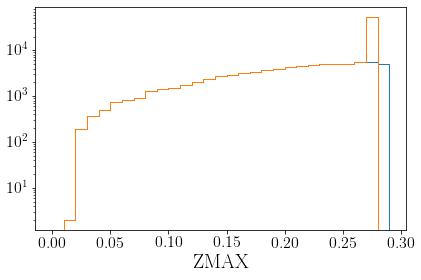

In [11]:
_ = pl.hist( gama_ddp['ZMAX'], bins=np.arange(0.0, 0.3, 0.01), histtype='step')
_ = pl.hist(gama_vmax['ZMAX'], bins=np.arange(0.0, 0.3, 0.01), histtype='step')

pl.xlabel('ZMAX')
pl.yscale('log')

In [12]:
# np.unique(gama_vmax['ZMIN'].data)

Text(0, 0.5, '$z_{\\rm max}$')

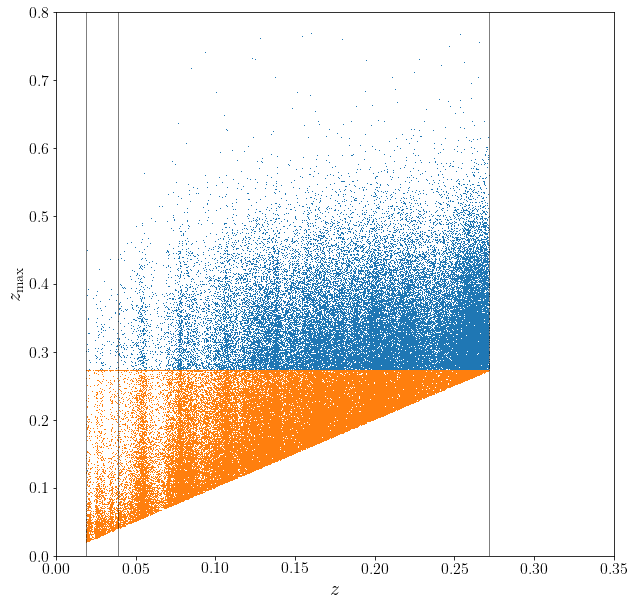

In [13]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.plot( gama_ddp['ZSURV'], gama_zmax['ZMAX'], marker=',', lw=0.0)
ax.plot(gama_vmax['ZSURV'], gama_vmax['ZMAX'], marker=',', lw=0.0)

ax.axvline(0.0188, c='k', lw=0.5) 
ax.axvline(0.0390, c='k', lw=0.5) 
ax.axvline(0.2715, c='k', lw=0.5) 

ax.set_xlim(0.0, 0.35)
ax.set_ylim(0.0, 0.80)

ax.set_xlabel(r'$z$')
ax.set_ylabel(r'$z_{\rm max}$')

Text(0, 0.5, '$z_{\\rm min}$')

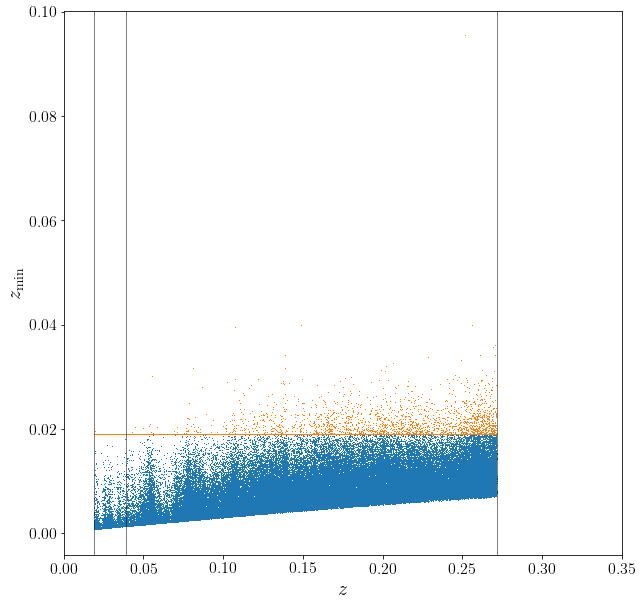

In [14]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.plot( gama_ddp['ZSURV'], gama_zmax['ZMIN'], marker=',', lw=0.0)
ax.plot(gama_vmax['ZSURV'], gama_vmax['ZMIN'], marker=',', lw=0.0)

ax.axvline(0.0188, c='k', lw=0.5) 
ax.axvline(0.0390, c='k', lw=0.5) 
ax.axvline(0.2715, c='k', lw=0.5) 

ax.set_xlim(0.0, 0.35)
# ax.set_ylim(0.0, 0.05)

ax.set_xlabel(r'$z$')
ax.set_ylabel(r'$z_{\rm min}$')

Text(0, 0.5, '$\\langle$ FILL FACTOR $\\rangle$')

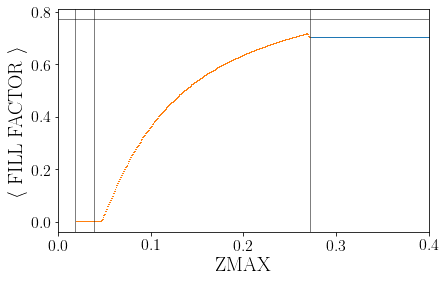

In [15]:
pl.plot(gama_ddp['ZMAX'],   gama_ddp['FILLFACTOR_VMAX'], marker=',', lw=0.0)
pl.plot(gama_vmax['ZMAX'], gama_vmax['FILLFACTOR_VMAX'], marker=',', lw=0.0)

pl.axvline(0.0188, c='k', lw=0.5) 
pl.axvline(0.0390, c='k', lw=0.5) 
pl.axvline(0.2715, c='k', lw=0.5) 

pl.axhline(0.7737,   c='k', lw=0.5)

pl.xlim(0.0, 0.4)

pl.xlabel('ZMAX')
pl.ylabel(r'$\langle$ FILL FACTOR $\rangle$')

(0.2, 1.03)

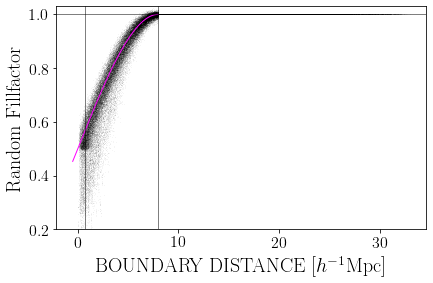

In [16]:
bds = np.arange(-0.5, 8., 0.01)

pl.scatter(gama_ddp['BOUND_DIST'], gama_ddp['FILLFACTOR'], marker='.', lw=0.0, s=2, alpha=0.05, c='k')
pl.plot(bds, fillfactor_expectation(bds), lw=1., c='magenta')

pl.xlabel('BOUNDARY DISTANCE [$h^{-1}$Mpc]')
pl.ylabel(r'Random Fillfactor')

pl.axhline(1.00, c='k', lw=0.5)
pl.axvline(8.00, c='k', lw=0.5)

pl.axvline(np.median(gama_ddp['RANDSEP']), c='k', lw=0.5)

pl.ylim(0.2, 1.03)

(0.2, 1.03)

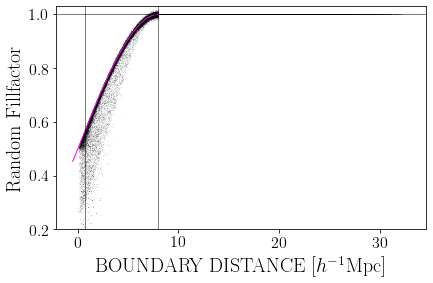

In [19]:
bds = np.arange(-0.5, 8., 0.01)

pl.scatter(gama_ddp['BOUND_DIST'], gama_ddp['rFILLFACTOR'], marker='.', lw=0.0, s=2, alpha=0.05, c='k')
pl.plot(bds, fillfactor_expectation(bds), lw=1., c='magenta')

pl.xlabel('BOUNDARY DISTANCE [$h^{-1}$Mpc]')
pl.ylabel(r'Random Fillfactor')

pl.axhline(1.00, c='k', lw=0.5)
pl.axvline(8.00, c='k', lw=0.5)

pl.axvline(np.median(gama_ddp['RANDSEP']), c='k', lw=0.5)

pl.ylim(0.2, 1.03)

Text(0, 0.5, '$g$FILLFACTOR')

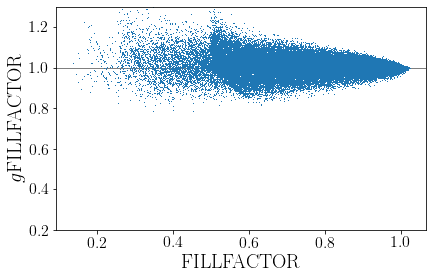

In [20]:
pl.axhline(1.0, c='k', lw=0.5)

pl.plot(gama_ddp['FILLFACTOR'], gama_ddp['rFILLFACTOR'] / gama_ddp['FILLFACTOR'], lw=0.0, marker=',')

pl.ylim(0.2, 1.3)

pl.xlabel('FILLFACTOR')
pl.ylabel(r'$g$FILLFACTOR')

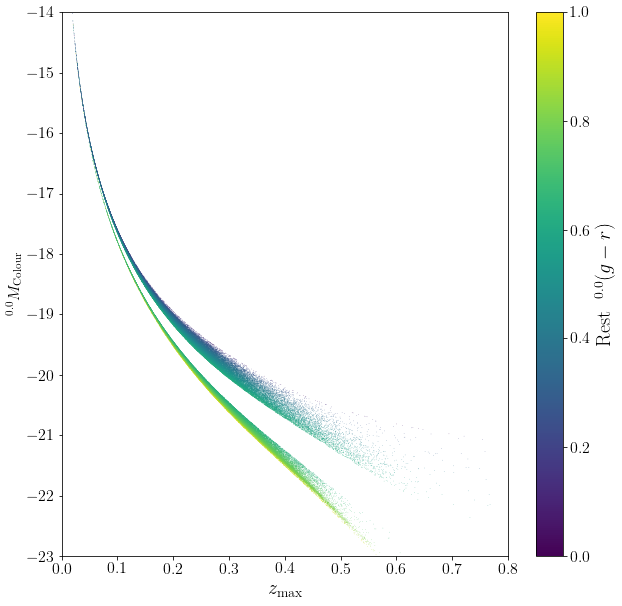

In [22]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

sc = ax.scatter(gama_zmax['ZMAX'], gama_zmax['MCOLOR_0P0'], marker='.', lw=0.0, s=1, c=gama_zmax['REST_GMR_0P0'], vmin=0.0, vmax=1.0)

ax.set_xlim(0.0,   0.8)
ax.set_ylim(-23., -14.)

ax.set_xlabel(r'$z_{\rm max}$')
ax.set_ylabel(r'$^{0.0}M_{\rm Colour}$', fontsize=16)

plt.colorbar(sc, label='Rest \ $^{0.0}(g-r)$')

Text(0, 0.5, 'DEC [deg.]')

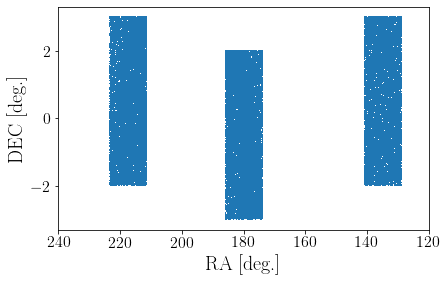

In [23]:
pl.plot(gama_zmax['RA'], gama_zmax['DEC'], marker=',', lw=0.0)

pl.xlim(240., 120.)

pl.xlabel('RA [deg.]')
pl.ylabel('DEC [deg.]')

In [24]:
fpath   = findfile(ftype='lumfn', dryrun=dryrun, version=version, survey=survey)
gama_lf = Table.read(fpath)
gama_lf

MEDIAN_M,MEAN_M,MID_M,IVMAXMEAN_M,PHI_N,PHI_N_ERROR,PHI_IVMAX,PHI_IVMAX_ERROR,N,V_ON_VMAX
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
-22.9,-22.9,-22.9,-22.9,0.0,0.0,0.0,0.0,0.0,0.0
-22.819730991835396,-22.85261904735238,-22.7,-22.852619047352377,4.318070947645283e-06,1.6320774101432039e-06,6.656485134612901e-06,2.51591489599772e-06,7.0,0.6487013581975639
-22.702217608094877,-22.696279256593694,-22.5,-22.696279256593687,3.0843363911752027e-05,4.3619103553208596e-06,4.7546322390092156e-05,6.7240653965031875e-06,50.0,0.6487013581975639
-22.462979479370226,-22.480805515921833,-22.299999999999997,-22.480805515921848,5.305058592821348e-05,5.720591800706566e-06,8.177967451095846e-05,8.818529094191202e-06,86.0,0.6487013581975639
-22.284809886922197,-22.2911405882402,-22.099999999999998,-22.291140588240204,0.00010733490641289705,8.137038255934194e-06,0.00016546120191752065,1.2543581346188633e-05,174.0,0.6487013581975639
-22.096993763164484,-22.09763156459821,-21.9,-22.097631564598217,0.0002115854764346189,1.1424541871002429e-05,0.00032616777159603206,1.761140427198404e-05,343.0,0.6487013581975639
-21.885598483498715,-21.890410502954545,-21.7,-21.890410502954545,0.0003713541014974944,1.5135263256784742e-05,0.0005724577215767094,2.333163491261761e-05,602.0,0.6487013581975639
-21.688629510276517,-21.691961988929833,-21.5,-21.691961988929826,0.0006002118617226944,1.9241908884132697e-05,0.0009252514337111935,2.9662199162950602e-05,973.0,0.6487013581975639
-21.489444841163664,-21.49276283529265,-21.299999999999997,-21.492762835292645,0.000975884034167834,2.4535503419130063e-05,0.001504365640422516,3.782249429429697e-05,1582.0,0.6487013581975639


Text(0.5, 0, '$V/V_{Max}$')

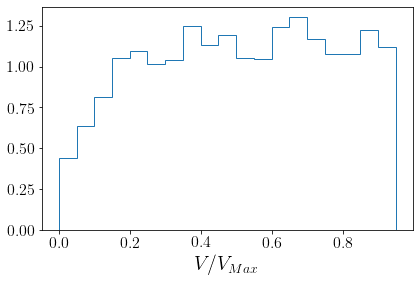

In [25]:
_ = pl.hist(gama_vmax['VZ'] / gama_vmax['VMAX'], bins=np.arange(0.0, 1.0, 0.05), histtype='step', density=True)

pl.xlabel('$V/V_{Max}$')

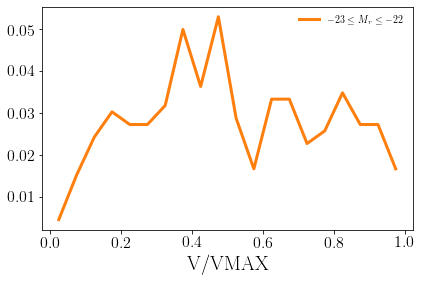

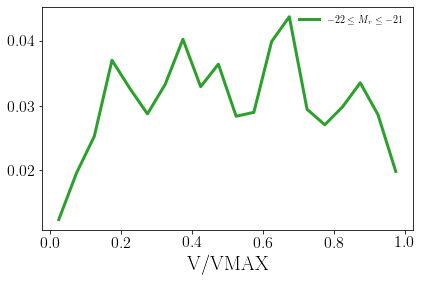

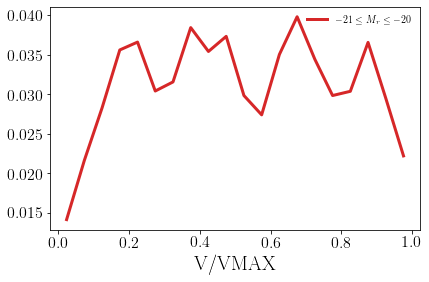

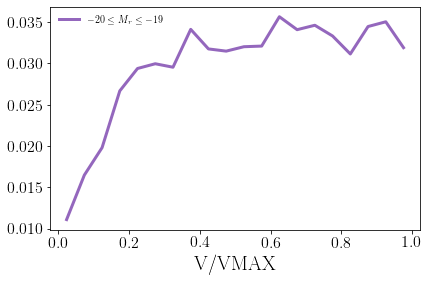

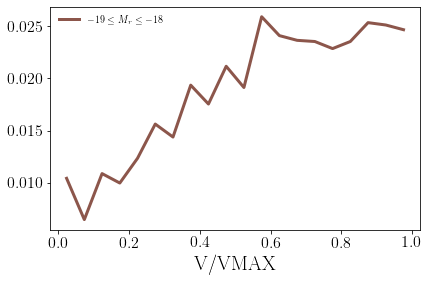

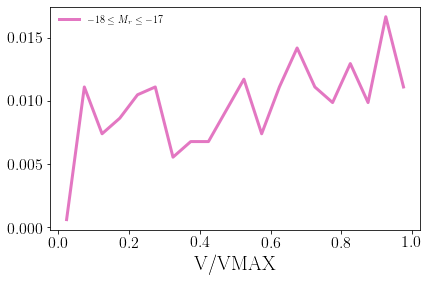

In [26]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
idx    = np.digitize(gama_vmax['MCOLOR_0P0'], np.arange(-23., -17., 1.))

for count, jj in enumerate(np.unique(idx)):
    sample = gama_vmax[(idx == jj) & (gama_vmax['MCOLOR_0P0'].data >= -23.) & (gama_vmax['MCOLOR_0P0'].data <= -17.)]
    nsample = len(sample)

    if nsample == 0:
        continue
    
    dbin = 0.05
    bins = np.arange(0., 1.001, dbin)
    
    ns, _ = np.histogram(sample['VZ'] / sample['VMAX'], bins=bins)
    
    centres = bins[:-1] + dbin/2.
    
    plt.plot(centres, ns / nsample, color=colors[count], label=r'${:.0f} \leq M_r \leq {:.0f}$'.format(sample['MCOLOR_0P0'].min(),\
                                                                                                       sample['MCOLOR_0P0'].max()))

    plt.xlabel('V/VMAX')
    plt.legend(frameon=False)
    
    pl.show()

In [27]:
spurious = gama_zmax[gama_zmax['REST_GMR_0P1_WARN'] > 0.0]
spurious.sort('GMR')
spurious

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64
84548,587722983886881328,178.41186365,0.53094523,19.129574,0.14889,4,G12_Y2_042_085,6,28.227417,29.744629,18.847836,29.051346,23.953873,0.14889,497.94976691080626,38.48592766707365,G12,0,0,-433.23304428929094,12.01152005870378,4.016316713129331,433.142899165352,-15.032094939512701,3.5416242870717847,10.896793,19.129574,-99.0,2,1,-0.13889772296610337,-0.0765818069362224,0.022382996340270717,0.051262804552402355,10.867913557266384,0.8,-0.1444233,-0.11911201,-19.234313535404127,-19.25962483407251,-19.37873684139244,38.36388735742561,38.50831066341392,38.389198656093996,-0.07153357457968779,0.01002668527675725,0.14519130378251333,0.27520197499042054,-19.35712184284637,0.6704254,0.2045565206929093,0.0,-7.129574,0.0059108656363813005,0.0,3725782.2344622263


Text(0.5, 0, 'ZSURV')

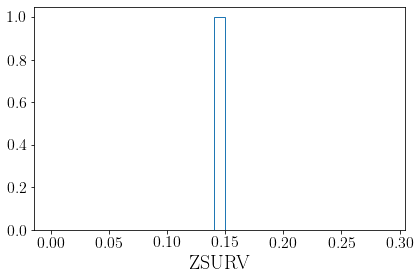

In [28]:
_ = pl.hist(spurious['ZSURV'], bins=np.arange(0.0, 0.3, 0.01), histtype='step')
pl.xlabel('ZSURV')

Text(0.5, 0, 'GMR')

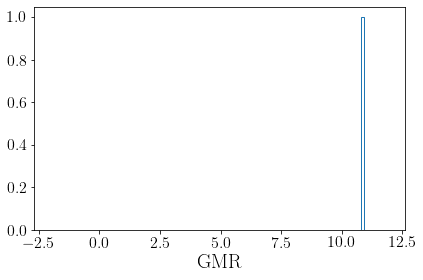

In [29]:
_ = pl.hist(spurious['GMR'], bins=np.arange(-2., 12., 0.1), histtype='step')
pl.xlabel('GMR')

Text(0.5, 0, 'MCOLOR_0P0')

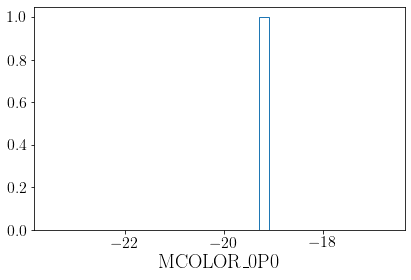

In [30]:
_ = pl.hist(spurious['MCOLOR_0P0'], bins=np.arange(-23.5, -16.5, 0.2), histtype='step')
pl.xlabel('MCOLOR_0P0')

In [31]:
gama_zmax.sort('ZMAX')
gama_zmax

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64
78982,587722983367966779,219.43813423,0.07880795,17.586954,0.21069,5,345782141184927744,6,18.2645,17.868378,17.567848,17.333746,17.30042,0.21069,732.9414969320795,39.32534655415001,G15,0,0,-467.5500709858969,-384.5713910261141,0.8326904983070628,470.2208914811346,381.3018876752127,0.3173612299916374,0.30052948,17.586954,0.13170774822191056,0,1,-0.19619757487891137,-0.027375843120353183,-0.034880126871333295,0.10071625950984983,0.16493309359928562,2.12,-0.2043693,-0.44666278,-21.499143003893057,-21.256849526834646,-21.703512310457388,39.08609712071434,39.29046642727867,38.84380364365593,-0.03977202648651637,0.1744464956821029,0.17695285187568474,0.4396217853957662,-21.710975982640075,2.2130451,-99.0,1.0,-5.586954,0.014802823191502936,0.0,--
3885866,588010930833720024,135.89216253,-1.59989053,19.79879,0.01913,3,G09_Y4_201_099,5,21.111166,19.830143,19.624992,19.463436,19.159803,0.01913,58.23656723127899,33.82597883732409,G9,0,0,-41.014753323858095,39.75694158101026,-1.595428630441649,40.734764295540565,-40.041964586359256,-1.6400720896142431,0.2051506,19.79879,0.21310850995874878,0,2,-0.13476045403622627,-0.14271835974692815,0.029341393698033152,0.00413602535927568,0.23035597258680435,2.12,-0.018556101,-0.0405556,-14.037974151747107,-14.015974652917862,-14.056530252994776,33.83676412977445,33.85532023102212,33.814764630945206,-0.18808820319905228,-0.24293694375240532,0.028636675163148828,0.022238345961257955,-14.037269433212224,0.001209259,0.01914057713140389,0.0,-7.79879,0.0005323764772190999,0.0,3415.9585541320084
8480,588848900987486613,182.47796837,0.67909776,19.789885,0.01915,4,G12_Y1_ND5_288,5,20.860147,19.998114,19.72312,19.643885,19.739418,0.01915,58.298373693126614,33.82828219867051,G12,0,0,-57.14543292081807,-2.4730081465030795,0.6779814634205791,57.16199627827204,2.074481777241864,0.6153362526587615,0.2749939,19.789885,0.29328450892908514,0,2,-0.14091228167316655,-0.15920289411787455,0.025932071473279666,0.006131474570549633,0.29479449338710506,2.12,-0.0185755,-0.040597998,-14.045754202186147,-14.023731705277244,-14.064329702883045,33.83563876944689,33.854214270143785,33.813616272537985,-0.18806031637460274,-0.24291135687966586,0.02866456198759837,0.022263932833997413,-14.048486692700466,0.01011467,0.019238826673532626,0.0,-7.7898846,0.0005343133974404233,0.0,3468.6376736824286
402403,587728308031390135,174.91458961,1.95910608,19.758127,0.01985,3,G12_Y1_AX2_319,5,21.195854,20.027178,19.75573,19.693892,19.629356,0.01985,60.462836372194296,33.90744258254336,G12,0,0,-59.01812145764674,5.252079477428639,2.0267626874846387,58.98225052833568,-5.663476012324586,1.9621234131980374,0.27144814,19.758127,0.28982214231761483,0,2,-0.13984703359337133,-0.15822104053500846,0.0268788856165742,0.006315277877057185,0.2920117431154936,2.12,-0.019254502,-0.042082,-14.1569397

In [32]:
spurious = gama_zmax[gama_zmax['ZMAX_WARN'] > 0.0]
spurious.sort('R_PETRO')
spurious

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64
78982,587722983367966779,219.43813423,0.07880795,17.586954,0.21069,5,345782141184927744,6,18.2645,17.868378,17.567848,17.333746,17.30042,0.21069,732.9414969320795,39.32534655415001,G15,0,0,-467.5500709858969,-384.5713910261141,0.8326904983070628,470.2208914811346,381.3018876752127,0.3173612299916374,0.30052948,17.586954,0.13170774822191056,0,1,-0.19619757487891137,-0.027375843120353183,-0.034880126871333295,0.10071625950984983,0.16493309359928562,2.12,-0.2043693,-0.44666278,-21.499143003893057,-21.256849526834646,-21.703512310457388,39.08609712071434,39.29046642727867,38.84380364365593,-0.03977202648651637,0.1744464956821029,0.17695285187568474,0.4396217853957662,-21.710975982640075,2.2130451,-99.0,1.0,-5.586954,0.014802823191502936,0.0,--


In [21]:
spurious = gama_zmax[gama_zmax['ZMIN_WARN'] > 0.0]
spurious.sort('R_PETRO')
spurious

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64


# Done.